### 실습
sklearn 타이타닉 생존자 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
titanic_df = pd.read_csv('./data/titanic_train.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 결측치 파악

In [5]:
titanic_df['Age'].isnull().sum()

177

In [6]:
titanic_df['Cabin'].isnull().sum()

687

In [7]:
titanic_df['Embarked'].isnull().sum()

2

Null 값 처리
- age = 평균나이
- 나머지 N 대체

In [8]:
print('Sex 분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin 분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 분포 : 
 B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F2             3
              ..
B30            1
B69            1
C86            1
D9             1
B73            1
Name: Cabin, Length: 147, dtype: int64

Embarked 분포 : 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [9]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df.fillna('N', inplace = True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

문자열 변수 빈도 분포 확인

In [10]:
# 선실 번호만 가져옴
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]  #.str[0]

### 성별에 따른 생존자 분포(EDA)

In [11]:
# 성별 분포 확인
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [12]:
# 생존 유무에 분포
titanic_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [13]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

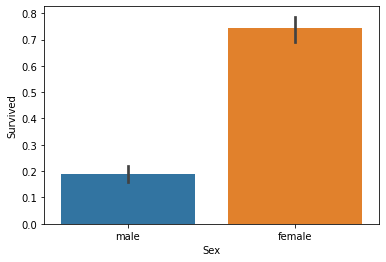

In [14]:
# 성별 생존자 그래프

sns.barplot(x='Sex', y='Survived', data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

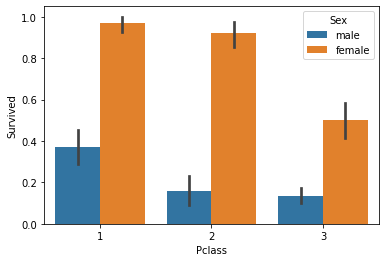

In [15]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data = titanic_df)

### 구간화(binning)

In [16]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else: cat = 'Elderly'
    return cat

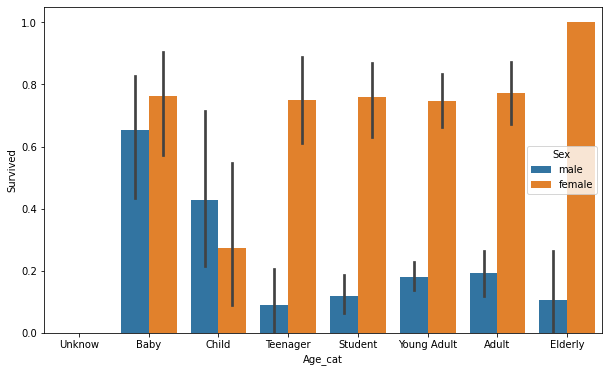

In [17]:
plt.figure(figsize=(10,6))
group_names = ['Unknow', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data = titanic_df, order = group_names)

titanic_df.drop('Age_cat', axis = 1, inplace = True)

### 데이터 인코딩

In [18]:
from sklearn import preprocessing

# 레이블 인코딩
def encode_features(dataDf):  # , features 추가해서 다른 데이터프레임에서도 사용가능하게 만들수 있음
    # 문자열 카테고리
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDf[feature])
        dataDf[feature] = le.transform(dataDf[feature])
        
    return dataDf

titanic_df = encode_features(titanic_df)
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,7,3


### 데이터 삭제

In [19]:
# 불필요한 변수 제거
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis =1, inplace=True)
titanic_df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.25,7,3


#### 지금까지 가공한 내용을 함수로 작성

In [20]:
from sklearn.preprocessing import LabelEncoder

# Null 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Fare'].fillna(0,inplace=True)
    df.fillna('N', inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis =1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

## 생존자 예측 프로세스

In [21]:
# 데이터 로딩
titanic_df = pd.read_csv('./data/titanic_train.csv')

# 결정값
y_titanic_df = titanic_df['Survived']
# 학습 데이터 셋
X_titanic_df = titanic_df.drop('Survived',axis=1)

### 데이터 전처리

In [22]:
# 함수호출로 전처리 실행 --> feature 데이터 셋 완성
X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.25,7,3


### 학습/ 테스트 데이터 분할

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

### 4단계 분류 알고리즘을 적용
- 3개의 ML 알고리즘 수행
    - 결정트리, 랜덤 포레스트, 로지스틱 회귀
- 예측 수행 후 교차 검증으로 평가

**사이킷런 클래스**
- 결정트리 : DecisionTreeClassifier
- 랜덤 포레스트 : RandomForestClassifier
- 로지스틱 회귀 : LogisticRegression

**분리한 학습 데이터와 테스트 데이터 기반**
- 머신러닝 모델을 학습(fit), 예측(predict)
- 예측 성능 평가 : 정확도 사용 (accuracy_score)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤 포레스트, 로지스틱 회귀 estimator 객체 생성
dt_clf = DecisionTreeClassifier(random_state=12)
rf_clf = RandomForestClassifier(random_state=12)
lr_clf = LogisticRegression()

# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier 정확도 : {accuracy_score(y_test, dt_pred):0.4f}')

# 랜덤 포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f'RandomForestClassifier 정확도 : {accuracy_score(y_test, rf_pred):0.4f}')

# 로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f'LogisticRegression 정확도 : {accuracy_score(y_test, lr_pred):0.4f}')


DecisionTreeClassifier 정확도 : 0.8101
RandomForestClassifier 정확도 : 0.8659
LogisticRegression 정확도 : 0.8492


C:\Users\j\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 교차 검증을 통한 모델 성능 향상

**KFold 사용**

In [25]:
import numpy
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits = folds)
    scores = []
    
    for iter_n, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print('교차 검증 %d 정확도 : %f' %(iter_n, accuracy))
    mean_accuracy = np.mean(scores)
    print('평균 정확도 : %f' % mean_accuracy)

In [26]:
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.748603
교차 검증 1 정확도 : 0.769663
교차 검증 2 정확도 : 0.792135
교차 검증 3 정확도 : 0.764045
교차 검증 4 정확도 : 0.808989
평균 정확도 : 0.776687


**cross_val_score 사용**

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_n, accuracy in enumerate(scores):
    print('교차 검증 {0}  정확도 : {1:.4f}'.format(iter_n, accuracy))

print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0  정확도 : 0.7542
교차 검증 1  정확도 : 0.7809
교차 검증 2  정확도 : 0.7921
교차 검증 3  정확도 : 0.7753
교차 검증 4  정확도 : 0.8146
평균 정확도 : 0.7834


**GridSearchCV 사용**

In [32]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 설정
parameters = {'max_depth' : [2,3,5,10],
             'min_samples_split' : [2,3,5],
             'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv =5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서 DecisionTreeClassifier 정확도 : 0.8715
